## 1 Importando as bibliotecas que iremos usar para fazer nossas tarefas

In [1]:
# Importando a biblioteca NumPy, que é usada para operações numéricas e manipulação de arrays
import numpy as np
# Importando a biblioteca Pandas, que é usada para manipulação e análise de dados
import pandas as pd
# Importando módulos para plotar gráficos e ajustar a formatação dos mesmos

# Matplotlib é uma biblioteca para criação de gráficos em Python
import matplotlib.pyplot as plt
# Matplotlib transforms é usado para transformações de coordenadas nos gráficos
import matplotlib.transforms as mtransforms
# AutoMinorLocator é usado para adicionar ticks menores automaticamente nos eixos dos gráficos
from matplotlib.ticker import AutoMinorLocator
# Line2D é usado para criar linhas em 2D nos gráficos
from matplotlib.lines import Line2D
# Seaborn é uma biblioteca de visualização de dados baseada no Matplotlib, que fornece uma interface de alto nível para desenhar gráficos estatísticos atraentes e informativos
import seaborn as sns
# Importando constantes físicas do modulo scipy. constantes
from scipy.constants import physical_constants

In [2]:
# Importando a biblioteca datasets do scikit-learn, que contém conjuntos de dados de exemplo
from sklearn import datasets

# Importando a função accuracy_score do scikit-learn para avaliar a precisão de modelos de classificação
from sklearn.metrics import accuracy_score

# Importando a classe StandardScaler do scikit-learn para padronizar os dados
from sklearn.preprocessing import StandardScaler

# Importando a classe LinearRegression do scikit-learn para criar modelos de regressão linear
from sklearn.linear_model import LinearRegression

# Importando a classe LogisticRegression do scikit-learn para criar modelos de regressão logística
from sklearn.linear_model import LogisticRegression

# Importando a função train_test_split do scikit-learn para dividir os dados em conjuntos de treinamento e teste
from sklearn.model_selection import train_test_split

# Importando métricas de avaliação para modelos de regressão do scikit-learn
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Importando métricas de avaliação para modelos de classificação do scikit-learn
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

## 2. Definindo grandezas que foram coletas na parte experimental

In [3]:
#standard acceleration of gravity
g= physical_constants['standard acceleration of gravity'][0]

## Definindo agora a base de dados que usaremos para treinar os modelos

### 1. Dicionário de Dados:

data_g1_c1_aco = {...}: Cria um dicionário chamado data_g1_c1_aco contendo os dados das medições de diferentes alunos para o cilindro de aço (C1=Cilindro Aço).

lembrando que g1 no nome "data_g1..." refere-se ao grupo g1. Enquanto que os demais grupos serão referenciados por g2, g3... g6 

* 'Medida': [...]: Chave do dicionário que contém os números das medições.

* 'Aluno 1': [...]: Chave do dicionário que contém as medições do Aluno 1.

* 'Aluno 2': [...]: Chave do dicionário que contém as medições do Aluno 2.

* 'Aluno 3': [...]: Chave do dicionário que contém as medições do Aluno 3.

* 'Aluno 4': [...]: Chave do dicionário que contém as medições do Aluno 4.

* 'Aluno 5': [...]: Chave do dicionário que contém as medições do Aluno 5.

### 2.Criação do DataFrame:

* df_g1_c1_aco = pd.DataFrame(data_g1_c1_aco): Cria um DataFrame chamado df_g1_c1_aco a partir do dicionário de dados data_g1_c1_aco.


## Dados medidos para Grupo 1

### Dados dos cilindros e plano inclinado grupo 1

In [4]:
## Dados cilindro de aço
delta_s = np.array([113, 113, 112.9, 112.9, 113, 112.9])
comprimento_g1 = np.random.choice(delta_s, size=20, replace=True)
massa_medida_c1_g1 =np.array([826.6,	826.6,	826.6])  # g
massa_c1_g1=np.random.choice(massa_medida_c1_g1, size=20, replace=True)
diametro_medido_c1=[49.9,	49.8,	50.0,	49.9,	49.9,	49.8] ## mm
diametro_c1_g1 = np.random.choice(diametro_medido_c1, size=20, replace=True)
altura_medida_c1=[50.01,	50.01,	50.02,	50.02,	50.03,	50.01] # mm
altura_c1_g1 = np.random.choice(altura_medida_c1, size=20, replace=True)

## Dados cilindro de aluminio
massa_medida_c2_g1 =np.array([265.8, 265.8,	265.8,265.8]) # g
massa_c2_g1=np.random.choice(massa_medida_c2_g1, size=20, replace=True)
diametro_medido_c2=[49.9,	49.8,	50.00,	49.8,	49.90] ## mm
diametro_c2_g1 = np.random.choice(diametro_medido_c2, size=20, replace=True)
altura_medida_c2=[49.8,	49.8,	50.0,	49.8] ## mm
altura_c2_g1 = np.random.choice(altura_medida_c2, size=20, replace=True)

In [5]:
## Dados G1 os tempos que foram medidos
data_g1_c1_aco = {
    'Medida': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20],
    'Aluno 1 ': [
        '3.34', '3.35', '3.56', '3.40', '3.35', '3.47', '3.38', '3.44', '3.39', '3.41',
        '3.29', '3.34', '3.44', '3.38', '3.38', '3.41', '3.40', '3.41', '3.28', '3.41'
    ],
    'Aluno 2 ': [
        '3.40', '3.57', '3.28', '3.31', '3.33', '3.40', '3.32', '3.53', '3.41', '3.32',
        '3.32', '3.49', '3.42', '3.44', '3.39', '3.22', '3.38', '3.47', '3.40', '3.68'
    ],
    'Aluno 3 ': [
        '3.44', '3.12', '3.50', '3.44', '3.29', '3.47', '3.50', '3.40', '3.52', '3.55',
        '3.44', '3.31', '3.44', '3.44', '3.45', '3.46', '3.38', '3.66', '3.31', '3.54'
    ],
    'Aluno 4 ': [
        '3.44', '3.63', '3.44', '3.46', '3.63', '3.44', '3.47', '3.50', '3.40', '3.53',
        '3.44', '3.38', '3.46', '3.50', '3.62', '3.34', '3.59', '3.50', '3.53', '3.46'
    ],
    'Grupo': np.repeat('g1',20),
    'Material': np.repeat('aco',20),
    'massa': massa_c1_g1,
    'diametro':diametro_c1_g1,
    'altura': altura_c1_g1,
    'comprimento': comprimento_g1,   
    
}
df_g1_aco = pd.DataFrame(data_g1_c1_aco)

df_g1_aco['velocidade 1']=[c/t for c,t in zip(df_g1_aco['comprimento'].astype(float),df_g1_aco['Aluno 1 '].astype(float))]
df_g1_aco['velocidade 2']=[c/t for c,t in zip(df_g1_aco['comprimento'].astype(float),df_g1_aco['Aluno 2 '].astype(float))]
df_g1_aco['velocidade 3']=[c/t for c,t in zip(df_g1_aco['comprimento'].astype(float),df_g1_aco['Aluno 3 '].astype(float))]
df_g1_aco['velocidade 4']=[c/t for c,t in zip(df_g1_aco['comprimento'].astype(float),df_g1_aco['Aluno 4 '].astype(float))]

#print(df_g1_aco)

data_g1_c2_aluminio = {
    'Medida': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20],
    'Aluno 1 ': [
        '3.41', '3.53', '3.40', '3.35', '3.47', '3.34', '3.14', '3.25', '3.39', '3.44',
        '3.31', '3.41', '3.50', '3.35', '3.41', '3.46', '3.22', '3.44', '3.41', '3.31'
    ],
    'Aluno 2 ': [
        '3.41', '3.37', '3.38', '3.37', '3.47', '3.25', '3.53', '3.37', '3.53', '3.37',
        '3.65', '3.24', '3.38', '3.39', '3.38', '3.31', '3.47', '3.23', '3.44', '3.57'
    ],
    'Aluno 3 ': [
        '3.28', '3.35', '3.37', '3.31', '3.49', '3.35', '3.28', '3.31', '3.41', '3.50',
        '3.28', '3.25', '3.34', '3.34', '3.31', '3.19', '3.31', '3.40', '3.15', '3.35'
    ],
    'Aluno 4 ': [
        '3.54', '3.34', '3.58', '3.58', '3.54', '3.58', '3.44', '3.58', '3.28', '3.37',
        '3.31', '3.44', '3.31', '3.28', '3.69', '3.40', '3.44', '3.50', '3.44', '3.41'
    ],
    'Grupo': np.repeat('g1',20),
    'Material': np.repeat('aluminio',20),
    'massa': massa_c2_g1,
    'diametro':diametro_c2_g1,
    'altura': altura_c2_g1,
    'comprimento': comprimento_g1,
}

df_g1_aluminio = pd.DataFrame(data_g1_c2_aluminio)

df_g1_aluminio['velocidade 1']=[c/t for c,t in zip(df_g1_aluminio['comprimento'].astype(float),df_g1_aluminio['Aluno 1 '].astype(float))]
df_g1_aluminio['velocidade 2']=[c/t for c,t in zip(df_g1_aluminio['comprimento'].astype(float),df_g1_aluminio['Aluno 2 '].astype(float))]
df_g1_aluminio['velocidade 3']=[c/t for c,t in zip(df_g1_aluminio['comprimento'].astype(float),df_g1_aluminio['Aluno 3 '].astype(float))]
df_g1_aluminio['velocidade 4']=[c/t for c,t in zip(df_g1_aluminio['comprimento'].astype(float),df_g1_aluminio['Aluno 4 '].astype(float))]

## Grupo 1 coletar gráficos abaixo

C:\Users\user\AppData\Local\Temp\ipykernel_992\1082232886.py:28: UserWarning: The figure layout has changed to tight
  fig.tight_layout()


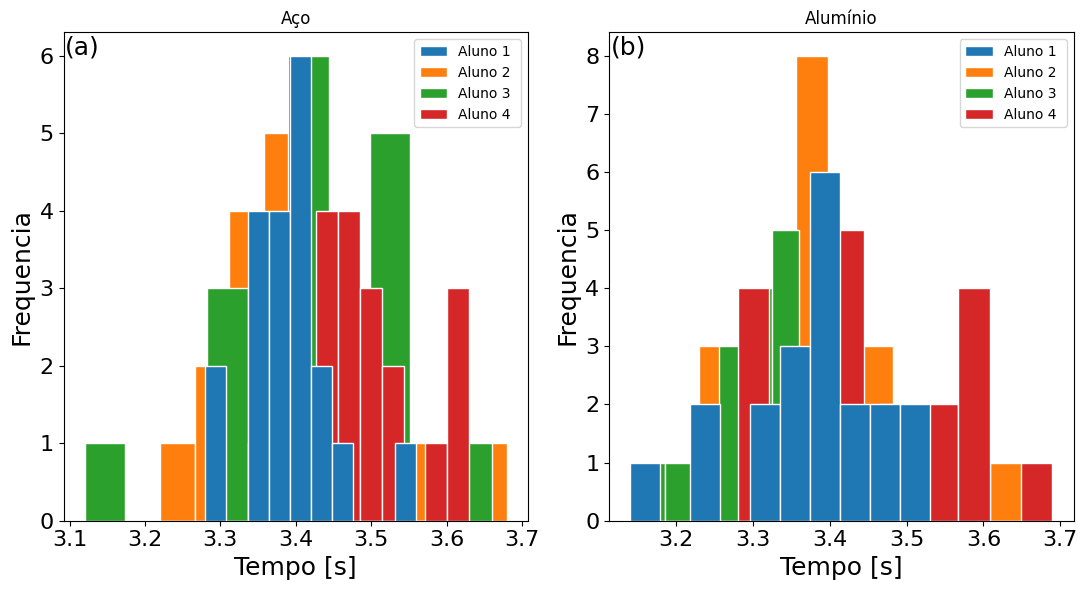

In [6]:
## Fazendo o histograma da contagem dos tempos obtidos na condição experimental 
## dados para o Grupo 1
fig, ax=plt.subplot_mosaic([['(a)', '(b)']],
                              figsize=(11, 6), constrained_layout=True)
df_g1_aco['Aluno 1 '].astype(float).plot(kind='hist', bins=10, ax=ax['(a)'],zorder=2, edgecolor='white', fontsize=16)
df_g1_aco['Aluno 2 '].astype(float).plot(kind='hist', bins=10, ax=ax['(a)'],zorder=1, edgecolor='white', fontsize=16)
df_g1_aco['Aluno 3 '].astype(float).plot(kind='hist', ax=ax['(a)'],bins=10, zorder=1, edgecolor='white', fontsize=16)
df_g1_aco['Aluno 4 '].astype(float).plot(kind='hist', ax=ax['(a)'],bins=10, zorder=1, edgecolor='white', fontsize=16)
ax['(a)'].set_xlabel('Tempo [s]', fontsize=18)
ax['(a)'].set_ylabel('Frequencia', fontsize=18)
ax['(a)'].set_title('Aço')
ax['(a)'].legend()
df_g1_aluminio['Aluno 1 '].astype(float).plot(kind='hist', bins=10,ax=ax['(b)'], zorder=2, edgecolor='white' ,fontsize=16)
df_g1_aluminio['Aluno 2 '].astype(float).plot(kind='hist', bins=10,ax=ax['(b)'], zorder=1, edgecolor='white' ,fontsize=16)
df_g1_aluminio['Aluno 3 '].astype(float).plot(kind='hist', bins=10,ax=ax['(b)'], zorder=1, edgecolor='white' ,fontsize=16)
df_g1_aluminio['Aluno 4 '].astype(float).plot(kind='hist', bins=10,ax=ax['(b)'], zorder=1, edgecolor='white' ,fontsize=16)
ax['(b)'].set_xlabel('Tempo [s]', fontsize=18)
ax['(b)'].set_ylabel('Frequencia', fontsize=18)
ax['(b)'].set_title('Alumínio')
ax['(b)'].legend()


# Escrevendo os itens (a), (b), ... em cada um dos gráficos da figura
for label, ax in ax.items():
    trans = mtransforms.ScaledTranslation(1.2/72, -2/72, fig.dpi_scale_trans) #-20/72, 7/72 ,, 10/72, -5/72,
    ax.text(0.0, 1.0, label, transform=ax.transAxes + trans,
            fontsize=18, verticalalignment='top')
fig.tight_layout()    
plt.show()

## Gerando dataset para ML

In [7]:
# Melt the Aluno columns
aluno_melted_g1_aluminio = pd.melt(
    df_g1_aluminio,
    id_vars=[
        "Medida",
        "Grupo",
        "Material",
        "massa",
        "diametro",
        "altura",
        "comprimento",
    ],
    value_vars=["Aluno 1 ", "Aluno 2 ", "Aluno 3 ", "Aluno 4 "],
    var_name="Aluno",
    value_name="Tempo",
)

# Melt the velocity columns
velocity_melted_g1_al = pd.melt(
    df_g1_aluminio,
    id_vars=["Medida"],
    value_vars=["velocidade 1", "velocidade 2", "velocidade 3", "velocidade 4"],
    var_name="Velocidade",
    value_name="Valor_Velocidade",
)

# Map velocities to the respective Aluno
velocity_melted_g1_al["Aluno"] = velocity_melted_g1_al["Velocidade"].str.extract(r'(\d)').astype(int)
velocity_melted_g1_al["Aluno"] = "Aluno " + velocity_melted_g1_al["Aluno"].astype(str)

# Merge the two melted DataFrames
df_tidy_g1_c2 = pd.merge(aluno_melted_g1_aluminio, velocity_melted_g1_al, on=["Medida", "Aluno"], how="left")

# Drop unnecessary columns and reorder
df_tidy_g1_c2 = df_tidy_g1_c2.drop(columns=["Velocidade"]).sort_values(by=["Medida", "Aluno"])

# Display the tidy DataFrame
df_tidy_g1_c2.head()


# Melt the Aluno columns
aluno_melted_g1_aco = pd.melt(
    df_g1_aco,
    id_vars=[
        "Medida",
        "Grupo",
        "Material",
        "massa",
        "diametro",
        "altura",
        "comprimento",
    ],
    value_vars=["Aluno 1 ", "Aluno 2 ", "Aluno 3 ", "Aluno 4 "],
    var_name="Aluno",
    value_name="Tempo",
)

# Melt the velocity columns
velocity_melted_g1_aco = pd.melt(
    df_g1_aco,
    id_vars=["Medida"],
    value_vars=["velocidade 1", "velocidade 2", "velocidade 3", "velocidade 4"],
    var_name="Velocidade",
    value_name="Valor_Velocidade",
)

# Map velocities to the respective Aluno
velocity_melted_g1_aco["Aluno"] = velocity_melted_g1_aco["Velocidade"].str.extract(r'(\d)').astype(int)
velocity_melted_g1_aco["Aluno"] = "Aluno " + velocity_melted_g1_aco["Aluno"].astype(str)

# Merge the two melted DataFrames
df_tidy_g1_c1 = pd.merge(aluno_melted_g1_aco, velocity_melted_g1_aco, on=["Medida", "Aluno"], how="left")

# Drop unnecessary columns and reorder
df_tidy_g1_c1 = df_tidy_g1_c1.drop(columns=["Velocidade"]).sort_values(by=["Medida", "Aluno"])

# Display the tidy DataFrame
df_tidy_g1_c1.head()



df_ml_ready_g1=pd.concat([df_tidy_g1_c1,df_tidy_g1_c2], ignore_index=True)

df_ml_ready_g1.head()

,Medida,Grupo,Material,massa,diametro,altura,comprimento,Aluno,Tempo,Valor_Velocidade
0,1,g1,aco,826.6,50.0,50.01,113.0,Aluno 1,3.34,NaN
1,1,g1,aco,826.6,50.0,50.01,113.0,Aluno 2,3.40,NaN
2,1,g1,aco,826.6,50.0,50.01,113.0,Aluno 3,3.44,NaN
3,1,g1,aco,826.6,50.0,50.01,113.0,Aluno 4,3.44,NaN
4,2,g1,aco,826.6,49.9,50.02,113.0,Aluno 1,3.35,NaN


## Modelo de classificação para os dados coletados e organizados

In [11]:
# Preparando os dados para classificação
X = df_ml_ready_g1[['Tempo']]
y = df_ml_ready_g1['Material']

# Codificação do rótulo do material
y = y.map({'aco': 0, 'aluminio': 1})

# Dividindo os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Treinando o modelo de classificação
model = LogisticRegression()
model.fit(X_train, y_train)

# Previsões
y_pred = model.predict(X_test)

# Avaliando o modelo
accuracy = accuracy_score(y_test, y_pred)

print(f'Acurácia do modelo: {accuracy * 100:.2f}%')

Acurácia do modelo: 62.50%


## Grupo 1 colete as metricas abaixo

In [12]:
# Avaliação do modelo
accuracy = accuracy_score(y_test, y_pred)
print(f"Acurácia: {accuracy:.2f}")
print("Relatório de Classificação:")
print(classification_report(y_test, y_pred))

Acurácia: 0.62
Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.64      0.58      0.61        24
           1       0.62      0.67      0.64        24

    accuracy                           0.62        48
   macro avg       0.63      0.62      0.62        48
weighted avg       0.63      0.62      0.62        48



### Dados dos cilindros e plano inclinado grupo 2

In [13]:
## Dados cilindro de aço
delta_s = np.array([110.2, 110.15, 110.2])
comprimento_g2 = np.random.choice(delta_s, size=20, replace=True)
massa_medida_c1_g2 =np.array([834.1,	834.7,	834.7]) #g
massa_c1_g2=np.random.choice(massa_medida_c1_g2, size=20, replace=True)
diametro_medido_c2=[50.06,	50.02,	50.00] # mm
diametro_c1_g2 = np.random.choice(diametro_medido_c1, size=20, replace=True)
altura_medida_c2=[50.01,	50.02,	50.02] # mm
altura_c1_g2 = np.random.choice(altura_medida_c1, size=20, replace=True)

## Dados cilindro de aluminio
massa_medida_c2_g2 =np.array([209.8, 257.2,	269.8]) #g
massa_c2_g2=np.random.choice(massa_medida_c2_g2, size=20, replace=True)
diametro_medido_c2=[50.00,	50.01,	50.00] # mm
diametro_c2_g2 = np.random.choice(diametro_medido_c2, size=20, replace=True)
altura_medida_c2=[50.00,	50.00,	50.00] # mm
altura_c2_g2 = np.random.choice(altura_medida_c2, size=20, replace=True)

In [14]:
## Dados G2 
data_g2_c1_aco = {
    'Medida': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20],
    'Aluno 1': [
        '3.34', '3.35', '3.56', '3.40', '3.35', '3.47', '3.38', '3.44', '3.39', '3.41',
        '3.29', '3.34', '3.44', '3.38', '3.38', '3.41', '3.40', '3.41', '3.28', '3.41'
    ],
    'Aluno 2': [
        '3.40', '3.57', '3.28', '3.31', '3.33', '3.40', '3.32', '3.53', '3.41', '3.32',
        '3.32', '3.49', '3.42', '3.44', '3.39', '3.22', '3.38', '3.47', '3.40', '3.68'
    ],
    'Aluno 3': [
        '3.44', '3.12', '3.50', '3.44', '3.29', '3.47', '3.50', '3.40', '3.52', '3.55',
        '3.44', '3.31', '3.44', '3.44', '3.45', '3.46', '3.38', '3.66', '3.31', '3.54'
    ],
    'Grupo': np.repeat('g2',20),
    'Material': np.repeat('aco',20),
    'massa': massa_c1_g2,
    'diametro':diametro_c1_g2,
    'altura': altura_c1_g2,
    'comprimento': comprimento_g2,       
}

df_g2_c1_aco = pd.DataFrame(data_g2_c1_aco)

df_g2_c1_aco['velocidade 1']=[c/t for c,t in zip(df_g2_c1_aco['comprimento'].astype(float),df_g2_c1_aco['Aluno 1'].astype(float))]
df_g2_c1_aco['velocidade 2']=[c/t for c,t in zip(df_g2_c1_aco['comprimento'].astype(float),df_g2_c1_aco['Aluno 2'].astype(float))]
df_g2_c1_aco['velocidade 3']=[c/t for c,t in zip(df_g2_c1_aco['comprimento'].astype(float),df_g2_c1_aco['Aluno 3'].astype(float))]


data_g2_c2_aluminio = {
    'Medida': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20],
    'Aluno 1': [
        '3.44', '3.63', '3.44', '3.46', '3.63', '3.44', '3.47', '3.50', '3.40', '3.53',
        '3.44', '3.38', '3.46', '3.50', '3.62', '3.34', '3.59', '3.50', '3.53', '3.46'
    ],
    'Aluno 2': [
        '3.41', '3.53', '3.40', '3.35', '3.47', '3.34', '3.14', '3.25', '3.39', '3.44',
        '3.31', '3.41', '3.50', '3.35', '3.41', '3.46', '3.22', '3.44', '3.41', '3.31'
    ],
    'Aluno 3': [
        '3.41', '3.37', '3.38', '3.37', '3.47', '3.25', '3.53', '3.37', '3.53', '3.37',
        '3.65', '3.24', '3.38', '3.39', '3.38', '3.31', '3.47', '3.23', '3.44', '3.57'
    ],
    'Aluno 4': [
        '3.28', '3.35', '3.37', '3.31', '3.49', '3.35', '3.28', '3.31', '3.41', '3.50',
        '3.28', '3.25', '3.34', '3.34', '3.31', '3.19', '3.31', '3.40', '3.15', '3.35'
    ],
    'Aluno 5': [
        '3.54', '3.34', '3.58', '3.58', '3.54', '3.58', '3.44', '3.58', '3.28', '3.37',
        '3.31', '3.44', '3.31', '3.28', '3.69', '3.40', '3.44', '3.50', '3.44', '3.41'
    ],
    'Grupo': np.repeat('g2',20),
    'Material': np.repeat('aluminio',20),
    'massa': massa_c2_g2,
    'diametro':diametro_c2_g2,
    'altura': altura_c2_g2,
    'comprimento': comprimento_g2,       
}


df_g2_c2_aluminio = pd.DataFrame(data_g2_c2_aluminio)


df_g2_c2_aluminio['velocidade 1']=[c/t for c,t in zip(df_g2_c2_aluminio['comprimento'].astype(float),df_g2_c2_aluminio['Aluno 1'].astype(float))]
df_g2_c2_aluminio['velocidade 2']=[c/t for c,t in zip(df_g2_c2_aluminio['comprimento'].astype(float),df_g2_c2_aluminio['Aluno 2'].astype(float))]
df_g2_c2_aluminio['velocidade 3']=[c/t for c,t in zip(df_g2_c2_aluminio['comprimento'].astype(float),df_g2_c2_aluminio['Aluno 3'].astype(float))]
df_g2_c2_aluminio['velocidade 4']=[c/t for c,t in zip(df_g2_c2_aluminio['comprimento'].astype(float),df_g2_c2_aluminio['Aluno 4'].astype(float))]
df_g2_c2_aluminio['velocidade 5']=[c/t for c,t in zip(df_g2_c2_aluminio['comprimento'].astype(float),df_g2_c2_aluminio['Aluno 5'].astype(float))]

In [15]:
df_g2_c2_aluminio.head(2)

,Medida,Aluno 1,Aluno 2,Aluno 3,Aluno 4,Aluno 5,Grupo,Material,massa,diametro,altura,comprimento,velocidade 1,velocidade 2,velocidade 3,velocidade 4,velocidade 5
0,1,3.44,3.41,3.41,3.28,3.54,g2,aluminio,257.2,50.00,50.0,110.2,32.034884,32.316716,32.316716,33.597561,31.129944
1,2,3.63,3.53,3.37,3.35,3.34,g2,aluminio,269.8,50.01,50.0,110.2,30.358127,31.218130,32.700297,32.895522,32.994012


### Grupo 2 colete os graficos abaixo

C:\Users\user\AppData\Local\Temp\ipykernel_34324\279566878.py:29: UserWarning: The figure layout has changed to tight
  fig.tight_layout()


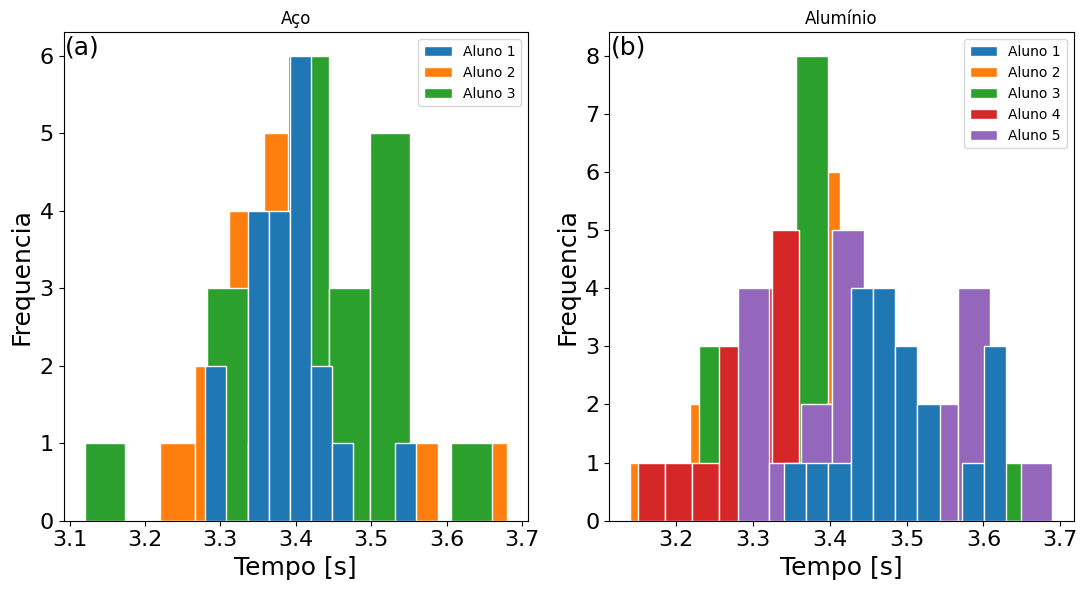

In [16]:
## Fazendo o histograma da contagem dos tempos obtidos na condição experimental 
## dados para o Grupo 2
fig, ax=plt.subplot_mosaic([['(a)', '(b)']],
                              figsize=(11, 6), constrained_layout=True)
df_g2_c1_aco['Aluno 1'].astype(float).plot(kind='hist', bins=10, ax=ax['(a)'],zorder=2, edgecolor='white', fontsize=16)
df_g2_c1_aco['Aluno 2'].astype(float).plot(kind='hist', bins=10, ax=ax['(a)'],zorder=1, edgecolor='white', fontsize=16)
df_g2_c1_aco['Aluno 3'].astype(float).plot(kind='hist', ax=ax['(a)'],bins=10, zorder=1, edgecolor='white', fontsize=16)
ax['(a)'].set_xlabel('Tempo [s]', fontsize=18)
ax['(a)'].set_ylabel('Frequencia', fontsize=18)
ax['(a)'].set_title('Aço')
ax['(a)'].legend()
df_g2_c2_aluminio['Aluno 1'].astype(float).plot(kind='hist', bins=10,ax=ax['(b)'], zorder=2, edgecolor='white' ,fontsize=16)
df_g2_c2_aluminio['Aluno 2'].astype(float).plot(kind='hist', bins=10,ax=ax['(b)'], zorder=1, edgecolor='white' ,fontsize=16)
df_g2_c2_aluminio['Aluno 3'].astype(float).plot(kind='hist', bins=10,ax=ax['(b)'], zorder=1, edgecolor='white' ,fontsize=16)
df_g2_c2_aluminio['Aluno 4'].astype(float).plot(kind='hist', bins=10,ax=ax['(b)'], zorder=1, edgecolor='white' ,fontsize=16)
df_g2_c2_aluminio['Aluno 5'].astype(float).plot(kind='hist', bins=10,ax=ax['(b)'], zorder=1, edgecolor='white' ,fontsize=16)
ax['(b)'].set_xlabel('Tempo [s]', fontsize=18)
ax['(b)'].set_ylabel('Frequencia', fontsize=18)
ax['(b)'].set_title('Alumínio')
ax['(b)'].legend()


# Escrevendo os itens (a), (b), ... em cada um dos gráficos da figura
for label, ax in ax.items():
    trans = mtransforms.ScaledTranslation(1.2/72, -2/72, fig.dpi_scale_trans) #-20/72, 7/72 ,, 10/72, -5/72,
    ax.text(0.0, 1.0, label, transform=ax.transAxes + trans,
            fontsize=18, verticalalignment='top')
    
fig.tight_layout()
plt.show()

## Dataset para ML

In [17]:
# Melt the Aluno columns
aluno_melted_g2_aluminio = pd.melt(
    df_g2_c2_aluminio,
    id_vars=[
        "Medida",
        "Grupo",
        "Material",
        "massa",
        "diametro",
        "altura",
        "comprimento",
    ],
    value_vars=["Aluno 1", "Aluno 2", "Aluno 3", "Aluno 4","Aluno 5"],
    var_name="Aluno",
    value_name="Tempo",
)

# Melt the velocity columns
velocity_melted_g2_al = pd.melt(
    df_g2_c2_aluminio,
    id_vars=["Medida"],
    value_vars=["velocidade 1", "velocidade 2", "velocidade 3", "velocidade 4", "velocidade 5"],
    var_name="Velocidade",
    value_name="Valor_Velocidade",
)

# Map velocities to the respective Aluno
velocity_melted_g2_al["Aluno"] = velocity_melted_g2_al["Velocidade"].str.extract(r'(\d)').astype(int)
velocity_melted_g2_al["Aluno"] = "Aluno " + velocity_melted_g2_al["Aluno"].astype(str)

# Merge the two melted DataFrames
df_tidy_g2_c2 = pd.merge(aluno_melted_g2_aluminio, velocity_melted_g2_al, on=["Medida", "Aluno"], how="left")

# Drop unnecessary columns and reorder
df_tidy_g2_c2 = df_tidy_g2_c2.drop(columns=["Velocidade"]).sort_values(by=["Medida", "Aluno"])

# Display the tidy DataFrame
df_tidy_g2_c2.head()


# Melt the Aluno columns
aluno_melted_g2_aco = pd.melt(
    df_g2_c1_aco,
    id_vars=[
        "Medida",
        "Grupo",
        "Material",
        "massa",
        "diametro",
        "altura",
        "comprimento",
    ],
    value_vars=["Aluno 1", "Aluno 2", "Aluno 3" ],
    var_name="Aluno",
    value_name="Tempo",
)

# Melt the velocity columns
velocity_melted_g2_aco = pd.melt(
    df_g2_c1_aco,
    id_vars=["Medida"],
    value_vars=["velocidade 1", "velocidade 2", "velocidade 3"],
    var_name="Velocidade",
    value_name="Valor_Velocidade",
)

# Map velocities to the respective Aluno
velocity_melted_g2_aco["Aluno"] = velocity_melted_g2_aco["Velocidade"].str.extract(r'(\d)').astype(int)
velocity_melted_g2_aco["Aluno"] = "Aluno " + velocity_melted_g2_aco["Aluno"].astype(str)

# Merge the two melted DataFrames
df_tidy_g2_c1 = pd.merge(aluno_melted_g2_aco, velocity_melted_g2_aco, on=["Medida", "Aluno"], how="left")

# Drop unnecessary columns and reorder
df_tidy_g2_c1 = df_tidy_g2_c1.drop(columns=["Velocidade"]).sort_values(by=["Medida", "Aluno"])

# Display the tidy DataFrame
df_tidy_g2_c1.head()



df_ml_ready_g2=pd.concat([df_tidy_g2_c1,df_tidy_g2_c2], ignore_index=True)

df_ml_ready_g2.head()

,Medida,Grupo,Material,massa,diametro,altura,comprimento,Aluno,Tempo,Valor_Velocidade
0,1,g2,aco,834.1,49.8,50.03,110.2,Aluno 1,3.34,32.994012
1,1,g2,aco,834.1,49.8,50.03,110.2,Aluno 2,3.40,32.411765
2,1,g2,aco,834.1,49.8,50.03,110.2,Aluno 3,3.44,32.034884
3,2,g2,aco,834.7,49.9,50.01,110.2,Aluno 1,3.35,32.895522
4,2,g2,aco,834.7,49.9,50.01,110.2,Aluno 2,3.57,30.868347


## Modelo de classificação para os dados coletados e organizados

In [18]:
# Preparando os dados para classificação
X = df_ml_ready_g2[['Tempo']]
y = df_ml_ready_g2['Material']

# Codificação do rótulo do material
y = y.map({'aco': 0, 'aluminio': 1})

# Dividindo os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Treinando o modelo de classificação
model = LogisticRegression()
model.fit(X_train, y_train)

# Previsões
y_pred = model.predict(X_test)

# Avaliando o modelo
accuracy = accuracy_score(y_test, y_pred)

print(f'Acurácia do modelo: {accuracy * 100:.2f}%')

Acurácia do modelo: 60.42%


## Grupo 2 colete as metricas

In [19]:
# Avaliação do modelo
accuracy = accuracy_score(y_test, y_pred)
print(f"Acurácia: {accuracy:.2f}")
print("Relatório de Classificação:")
print(classification_report(y_test, y_pred))

Acurácia: 0.60
Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        19
           1       0.60      1.00      0.75        29

    accuracy                           0.60        48
   macro avg       0.30      0.50      0.38        48
weighted avg       0.37      0.60      0.46        48



c:\Users\user\.conda\envs\ww_nomad_lab\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\user\.conda\envs\ww_nomad_lab\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\user\.conda\envs\ww_nomad_lab\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Dados dos cilindros e plano inclinado grupo 3

In [20]:
## Dados cilindro de aço
delta_s = np.array([93.8, 93.9, 93.9, 93.9, 93.9])
comprimento_g3 = np.random.choice(delta_s, size=20, replace=True)
massa_medida_c1_g3 =np.array([834.7,	834.7,	834.7, 834.7, 834.6]) # g
massa_c1_g3=np.random.choice(massa_medida_c1_g3, size=20, replace=True)
diametro_medido_c1=[50.06,	50.02,	50.00, 49.9, 49.8] ## mm
diametro_c1_g3 = np.random.choice(diametro_medido_c1, size=20, replace=True)
altura_medida_c1=[50.01,	50.02,	50.02, 50.00, 50.00] # mm
altura_c1_g3 = np.random.choice(altura_medida_c1, size=20, replace=True)

## Dados cilindro de aluminio
massa_medida_c2_g3 =np.array([265.8, 265.8,	265.8, 265.8, 265.8]) # g
massa_c2_g3=np.random.choice(massa_medida_c2_g3, size=20, replace=True)
diametro_medido_c2=[49.8,	50.00,	50.00, 49.9, 49.8] # mm 
diametro_c2_g3 = np.random.choice(diametro_medido_c2, size=20, replace=True)
altura_medida_c2=[50.00,	50.00,	50.00, 50.00, 50.00]  # mm
altura_c2_g3 = np.random.choice(altura_medida_c2, size=20, replace=True)

In [49]:
## Dados G3
data_g3_c1_aco = {
    'Medida': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20],
    'Aluno 1': [
        '3.34', '3.35', '3.56', '3.40', '3.35', '3.47', '3.38', '3.44', '3.39', '3.41',
        '3.29', '3.34', '3.44', '3.38', '3.38', '3.41', '3.40', '3.41', '3.28', '3.41'
    ],
    'Aluno 2': [
        '3.40', '3.57', '3.28', '3.31', '3.33', '3.40', '3.32', '3.53', '3.41', '3.32',
        '3.32', '3.49', '3.42', '3.44', '3.39', '3.22', '3.38', '3.47', '3.40', '3.68'
    ],
    'Aluno 3': [
        '3.44', '3.12', '3.50', '3.44', '3.29', '3.47', '3.50', '3.40', '3.52', '3.55',
        '3.44', '3.31', '3.44', '3.44', '3.45', '3.46', '3.38', '3.66', '3.31', '3.54'
    ],
    'Aluno 4': [
        '3.44', '3.63', '3.44', '3.46', '3.63', '3.44', '3.47', '3.50', '3.40', '3.53',
        '3.44', '3.38', '3.46', '3.50', '3.62', '3.34', '3.59', '3.50', '3.53', '3.46'
    ],
    'Aluno 5': [
        '3.41', '3.53', '3.40', '3.35', '3.47', '3.34', '3.14', '3.25', '3.39', '3.44',
        '3.31', '3.41', '3.50', '3.35', '3.41', '3.46', '3.22', '3.44', '3.41', '3.31'
    ],
    'Grupo': np.repeat('g3',20),
    'Material': np.repeat('aco',20),
    'massa': massa_c1_g3,
    'diametro':diametro_c1_g3,
    'altura': altura_c1_g3,
    'comprimento': comprimento_g3,       
}

df_g3_c1_aco = pd.DataFrame(data_g3_c1_aco)

df_g3_c1_aco['velocidade 1']=[c/t for c,t in zip(df_g3_c1_aco['comprimento'].astype(float),df_g3_c1_aco['Aluno 1'].astype(float))]
df_g3_c1_aco['velocidade 2']=[c/t for c,t in zip(df_g3_c1_aco['comprimento'].astype(float),df_g3_c1_aco['Aluno 2'].astype(float))]
df_g3_c1_aco['velocidade 3']=[c/t for c,t in zip(df_g3_c1_aco['comprimento'].astype(float),df_g3_c1_aco['Aluno 3'].astype(float))]
df_g3_c1_aco['velocidade 4']=[c/t for c,t in zip(df_g3_c1_aco['comprimento'].astype(float),df_g3_c1_aco['Aluno 4'].astype(float))]
df_g3_c1_aco['velocidade 5']=[c/t for c,t in zip(df_g3_c1_aco['comprimento'].astype(float),df_g3_c1_aco['Aluno 5'].astype(float))]

data_g3_c2_aluminio = {'Medida': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20],
    'Aluno 1':    ['3.09', '3.04', '3.03', '2.97', '3.22', '3.06', '3.16', '3.09', '3.00', '3.19',
        '2.88', '2.87', '3.06', '3.25', '2.97', '3.09', '3.13', '3.03', '3.06', '3.00'],
    'Aluno 2':    ['3.12', '3.57', '3.31', '3.34', '3.12', '3.19', '3.28', '3.25', '3.25', '3.43',
        '3.22', '3.28', '3.18', '3.22', '3.16', '3.29', '3.13', '3.38', '3.41', '3.12'],
    'Aluno 3':    ['2.93', '2.72', '2.91', '3.16', '3.19', '3.22', '3.34', '3.22', '3.10', '3.19',
        '3.19', '3.16', '3.10', '3.19', '3.06', '3.09', '3.02', '3.06', '3.19', '3.25'],
    'Aluno 4':    ['3.00', '2.97', '3.18', '3.08', '3.00', '3.09', '3.07', '3.00', '3.00', '3.03',
        '2.97', '3.03', '3.10', '3.22', '3.10', '2.97', '3.10', '3.03', '3.19', '3.09'],
    'Aluno 5':    ['3.04', '3.03', '3.00', '2.97', '3.12', '2.94', '3.00', '2.91', '3.06', '3.09',
        '3.04', '3.13', '3.06', '2.28', '2.93', '2.91', '2.85', '2.75', '2.82', '3.00'],
    'Grupo': np.repeat('g3',20),
    'Material': np.repeat('aluminio',20),
    'massa': massa_c2_g3,
    'diametro':diametro_c2_g3,
    'altura': altura_c2_g3,
    'comprimento': comprimento_g3,       

    }


# Criando um DataFrame a partir do dicionário de dados
df_g3_c2_aluminio = pd.DataFrame(data_g3_c2_aluminio)

df_g3_c2_aluminio['velocidade 1']=[c/t for c,t in zip(df_g3_c2_aluminio['comprimento'].astype(float),df_g3_c2_aluminio['Aluno 1'].astype(float))]
df_g3_c2_aluminio['velocidade 2']=[c/t for c,t in zip(df_g3_c2_aluminio['comprimento'].astype(float),df_g3_c2_aluminio['Aluno 2'].astype(float))]
df_g3_c2_aluminio['velocidade 3']=[c/t for c,t in zip(df_g3_c2_aluminio['comprimento'].astype(float),df_g3_c2_aluminio['Aluno 3'].astype(float))]
df_g3_c2_aluminio['velocidade 4']=[c/t for c,t in zip(df_g3_c2_aluminio['comprimento'].astype(float),df_g3_c2_aluminio['Aluno 4'].astype(float))]
df_g3_c2_aluminio['velocidade 5']=[c/t for c,t in zip(df_g3_c2_aluminio['comprimento'].astype(float),df_g3_c2_aluminio['Aluno 5'].astype(float))]

## Grupo 3 colete os gráficos abaixo

C:\Users\user\AppData\Local\Temp\ipykernel_34324\1756031414.py:31: UserWarning: The figure layout has changed to tight
  fig.tight_layout()


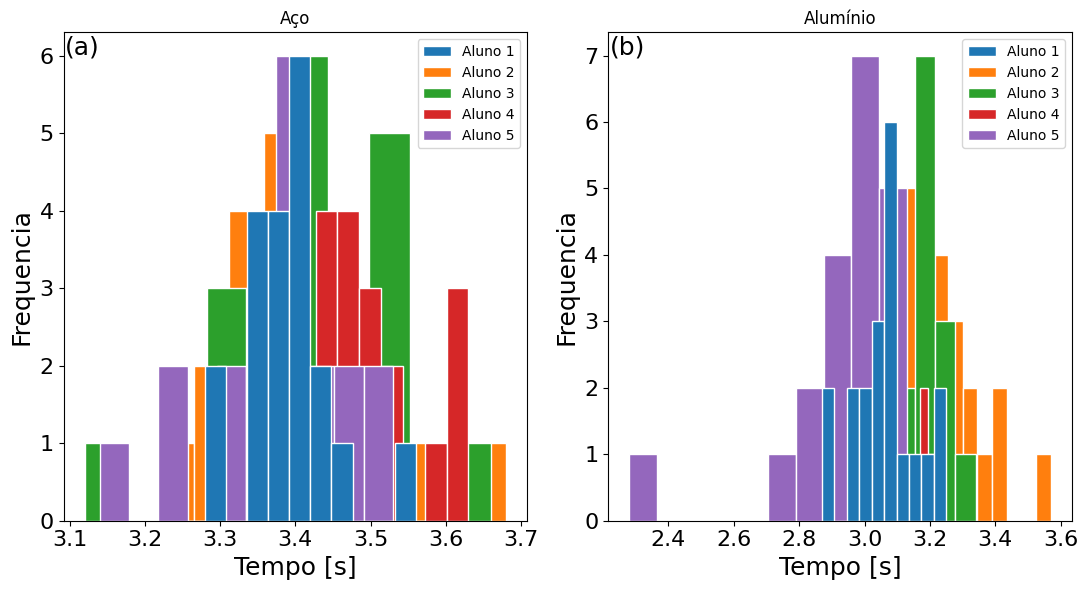

In [22]:
## Fazendo o histograma da contagem dos tempos obtidos na condição experimental 
## dados para o Grupo 3
fig, ax=plt.subplot_mosaic([['(a)', '(b)']],
                              figsize=(11, 6), constrained_layout=True)
df_g3_c1_aco['Aluno 1'].astype(float).plot(kind='hist', bins=10, ax=ax['(a)'],zorder=2, edgecolor='white', fontsize=16)
df_g3_c1_aco['Aluno 2'].astype(float).plot(kind='hist', bins=10, ax=ax['(a)'],zorder=1, edgecolor='white', fontsize=16)
df_g3_c1_aco['Aluno 3'].astype(float).plot(kind='hist', bins=10, ax=ax['(a)'],zorder=1, edgecolor='white', fontsize=16)
df_g3_c1_aco['Aluno 4'].astype(float).plot(kind='hist', bins=10, ax=ax['(a)'],zorder=1, edgecolor='white', fontsize=16)
df_g3_c1_aco['Aluno 5'].astype(float).plot(kind='hist', bins=10, ax=ax['(a)'],zorder=1, edgecolor='white', fontsize=16)
ax['(a)'].set_xlabel('Tempo [s]', fontsize=18)
ax['(a)'].set_ylabel('Frequencia', fontsize=18)
ax['(a)'].set_title('Aço')
ax['(a)'].legend()
df_g3_c2_aluminio['Aluno 1'].astype(float).plot(kind='hist', bins=10,ax=ax['(b)'], zorder=2, edgecolor='white' ,fontsize=16)
df_g3_c2_aluminio['Aluno 2'].astype(float).plot(kind='hist', bins=10,ax=ax['(b)'], zorder=1, edgecolor='white' ,fontsize=16)
df_g3_c2_aluminio['Aluno 3'].astype(float).plot(kind='hist', bins=10,ax=ax['(b)'], zorder=1, edgecolor='white' ,fontsize=16)
df_g3_c2_aluminio['Aluno 4'].astype(float).plot(kind='hist', bins=10,ax=ax['(b)'], zorder=1, edgecolor='white' ,fontsize=16)
df_g3_c2_aluminio['Aluno 5'].astype(float).plot(kind='hist', bins=10,ax=ax['(b)'], zorder=1, edgecolor='white' ,fontsize=16)
ax['(b)'].set_xlabel('Tempo [s]', fontsize=18)
ax['(b)'].set_ylabel('Frequencia', fontsize=18)
ax['(b)'].set_title('Alumínio')
ax['(b)'].legend()


# Escrevendo os itens (a), (b), ... em cada um dos gráficos da figura
for label, ax in ax.items():
    trans = mtransforms.ScaledTranslation(1.2/72, -2/72, fig.dpi_scale_trans) #-20/72, 7/72 ,, 10/72, -5/72,
    ax.text(0.0, 1.0, label, transform=ax.transAxes + trans,
            fontsize=18, verticalalignment='top')
    
fig.tight_layout()
plt.show()

## Dataset para ML

In [50]:
# df_g3_c2_aluminio
# Melt the Aluno columns
aluno_melted_g3_aluminio = pd.melt(
    df_g3_c2_aluminio,
    id_vars=[
        "Medida",
        "Grupo",
        "Material",
        "massa",
        "diametro",
        "altura",
        "comprimento",
    ],
    value_vars=["Aluno 1", "Aluno 2", "Aluno 3", "Aluno 4","Aluno 5"],
    var_name="Aluno",
    value_name="Tempo",
)

# Melt the velocity columns
velocity_melted_g3_al = pd.melt(
    df_g3_c2_aluminio,
    id_vars=["Medida"],
    value_vars=["velocidade 1", "velocidade 2", "velocidade 3", "velocidade 4", "velocidade 5"],
    var_name="Velocidade",
    value_name="Valor_Velocidade",
)

# Map velocities to the respective Aluno
velocity_melted_g3_al["Aluno"] = velocity_melted_g3_al["Velocidade"].str.extract(r'(\d)').astype(int)
velocity_melted_g3_al["Aluno"] = "Aluno " + velocity_melted_g3_al["Aluno"].astype(str)

# Merge the two melted DataFrames
df_tidy_g3_c2 = pd.merge(aluno_melted_g3_aluminio, velocity_melted_g3_al, on=["Medida", "Aluno"], how="left")

# Drop unnecessary columns and reorder
df_tidy_g3_c2 = df_tidy_g3_c2.drop(columns=["Velocidade"]).sort_values(by=["Medida", "Aluno"])

# Display the tidy DataFrame
df_tidy_g3_c2.head()

# df_g3_c1_aco
# Melt the Aluno columns
aluno_melted_g3_aco = pd.melt(
    df_g3_c1_aco,
    id_vars=[
        "Medida",
        "Grupo",
        "Material",
        "massa",
        "diametro",
        "altura",
        "comprimento",
    ],
    value_vars=["Aluno 1", "Aluno 2", "Aluno 3", "Aluno 4", "Aluno 5"],
    var_name="Aluno",
    value_name="Tempo",
)

# Melt the velocity columns
velocity_melted_g3_aco = pd.melt(
    df_g3_c1_aco,
    id_vars=["Medida"],
    value_vars=["velocidade 1", "velocidade 2", "velocidade 3", "velocidade 4", "velocidade 5"],
    var_name="Velocidade",
    value_name="Valor_Velocidade",
)

# Map velocities to the respective Aluno
velocity_melted_g3_aco["Aluno"] = velocity_melted_g3_aco["Velocidade"].str.extract(r'(\d)').astype(int)
velocity_melted_g3_aco["Aluno"] = "Aluno " + velocity_melted_g3_aco["Aluno"].astype(str)

# Merge the two melted DataFrames
df_tidy_g3_c1 = pd.merge(aluno_melted_g3_aco, velocity_melted_g3_aco, on=["Medida", "Aluno"], how="left")

# Drop unnecessary columns and reorder
df_tidy_g3_c1 = df_tidy_g3_c1.drop(columns=["Velocidade"]).sort_values(by=["Medida", "Aluno"])

# Display the tidy DataFrame
df_tidy_g3_c1.head()



df_ml_ready_g3=pd.concat([df_tidy_g3_c1,df_tidy_g3_c2], ignore_index=True)

df_ml_ready_g3.head()

,Medida,Grupo,Material,massa,diametro,altura,comprimento,Aluno,Tempo,Valor_Velocidade
0,1,g3,aco,834.6,49.9,50.0,93.8,Aluno 1,3.34,28.083832
1,1,g3,aco,834.6,49.9,50.0,93.8,Aluno 2,3.40,27.588235
2,1,g3,aco,834.6,49.9,50.0,93.8,Aluno 3,3.44,27.267442
3,1,g3,aco,834.6,49.9,50.0,93.8,Aluno 4,3.44,27.267442
4,1,g3,aco,834.6,49.9,50.0,93.8,Aluno 5,3.41,27.507331


### Modelo de classificação para os dados coletados e organizados

In [51]:
# Preparando os dados para classificação
X = df_ml_ready_g3[['Tempo']]
y = df_ml_ready_g3['Material']

# Codificação do rótulo do material
y = y.map({'aco': 0, 'aluminio': 1})

# Dividindo os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Treinando o modelo de classificação
model = LogisticRegression()
model.fit(X_train, y_train)

# Previsões
y_pred = model.predict(X_test)

# Avaliando o modelo
accuracy = accuracy_score(y_test, y_pred)

print(f'Acurácia do modelo: {accuracy * 100:.2f}%')

Acurácia do modelo: 93.33%


## Grupo 3 colete as metricas abaixo

In [52]:
# Avaliação do modelo
accuracy = accuracy_score(y_test, y_pred)
print(f"Acurácia: {accuracy:.2f}")
print("Relatório de Classificação:")
print(classification_report(y_test, y_pred))

Acurácia: 0.93
Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.94      0.94      0.94        31
           1       0.93      0.93      0.93        29

    accuracy                           0.93        60
   macro avg       0.93      0.93      0.93        60
weighted avg       0.93      0.93      0.93        60



## Dados dos cilindros e plano inclinado grupo 4

In [24]:
## Dados cilindro de aço
delta_s = np.array([95.6, 95.6, 95.6,95.6])
comprimento_g4 = np.random.choice(delta_s, size=20, replace=True)
massa_medida_c1_g4 =np.array([821.7,	821.7,	821.7]) 
massa_c1_g4=np.random.choice(massa_medida_c1_g4, size=20, replace=True)
diametro_medido_c2=[49.8,	49.8,	49.8]
diametro_c1_g4 = np.random.choice(diametro_medido_c1, size=20, replace=True)
altura_medida_c1=[50.1,	50.1,	50.2]
altura_c1_g4 = np.random.choice(altura_medida_c1, size=20, replace=True)

## Dados cilindro de aluminio
massa_medida_c2_g4 =np.array([265.1, 265.1,	265.1]) 
massa_c2_g4=np.random.choice(massa_medida_c2_g4, size=20, replace=True)
diametro_medido_c2=[50.0,	50.1,	50.0]
diametro_c2_g4 = np.random.choice(diametro_medido_c2, size=20, replace=True)
altura_medida_c2=[50.0,	50.0,	50.00]
altura_c2_g4 = np.random.choice(altura_medida_c2, size=20, replace=True)

In [25]:
# Dados G4
data_g4_aluminio = {
    'Medida': [i for i in range(1, 21)],  # Assuming there are 60 measurements
    'Aluno 1': [f"{value:.2f}" for value in [3.66,	3.17,	3.47,	3.53,	3.53,	3.63,	3.56,	3.13,	3.59,	3.56,	3.60,	3.53,	3.43,	3.65,	3.57,	3.62,	3.66,	3.62,	3.43,	3.50]],
    'Aluno 2': [f"{value:.2f}" for value in [3.50,	3.71,	3.53,	3.47,	3.59,	3.50,	3.41,	3.53,	3.55,	3.53,	3.59,	3.56,	3.50,	3.63,	3.63,	3.55,	3.55,	3.62,	3.55,	3.55]],
    'Aluno 3': [f"{value:.2f}" for value in [3.55,	3.58,	3.53,	3.69,	3.72,	3.75,	3.59,	3.53,	3.62,	3.60,	3.50,	3.50,	3.59,	3.47,	3.53,	3.31,	3.44,	3.31,	3.43,	3.44]],
    'Grupo': np.repeat('g4',20),
    'Material': np.repeat('aluminio',20),
    'massa': massa_c2_g4,
    'diametro':diametro_c2_g4,
    'altura': altura_c2_g4,
    'comprimento': comprimento_g4, 
}

df_g4_c1_aluminio = pd.DataFrame(data_g4_aluminio)

df_g4_c1_aluminio['velocidade 1']=[c/t for c,t in zip(df_g4_c1_aluminio['comprimento'].astype(float),df_g4_c1_aluminio['Aluno 1'].astype(float))]
df_g4_c1_aluminio['velocidade 2']=[c/t for c,t in zip(df_g4_c1_aluminio['comprimento'].astype(float),df_g4_c1_aluminio['Aluno 2'].astype(float))]
df_g4_c1_aluminio['velocidade 3']=[c/t for c,t in zip(df_g4_c1_aluminio['comprimento'].astype(float),df_g4_c1_aluminio['Aluno 3'].astype(float))]


data_g4_aco = {
    'Medida': [i for i in range(1, 21)],  # Assuming there are 60 measurements
    'Aluno 1': [f"{value:.2f}" for value in [3.59,	3.59,	3.51,	3.42,	3.44,	3.43,	3.34,	3.53,	3.66,	3.60,	3.57,	3.50,	3.57,	3.59,	3.51,	3.59,	3.50,	3.53,	3.56,	3.61]],
    'Aluno 2': [f"{value:.2f}" for value in [3.66,	3.21,	3.50,	3.50,	3.34,	3.53,	3.42,	3.52,	3.13,	3.44,	3.65,	3.43,	3.48,	3.40,	3.56,	3.59,	3.64,	3.50,	3.50,	3.50]],
    'Aluno 3': [f"{value:.2f}" for value in [3.50,	3.59,	3.53,	3.50,	3.53,	3.53,	3.53,	3.53,	3.60,	3.53,	3.53,	3.60,	3.63,	3.56,	3.55,	3.70,	3.53,	3.53,	3.59,	3.54]],
    'Grupo': np.repeat('g4',20),
    'Material': np.repeat('aco',20),
    'massa': massa_c1_g4,
    'diametro':diametro_c1_g4,
    'altura': altura_c1_g4,
    'comprimento': comprimento_g4, 
}

df_g4_c2_aco = pd.DataFrame(data_g4_aco)

df_g4_c2_aco['velocidade 1']=[c/t for c,t in zip(df_g4_c2_aco['comprimento'].astype(float),df_g4_c2_aco['Aluno 1'].astype(float))]
df_g4_c2_aco['velocidade 2']=[c/t for c,t in zip(df_g4_c2_aco['comprimento'].astype(float),df_g4_c2_aco['Aluno 2'].astype(float))]
df_g4_c2_aco['velocidade 3']=[c/t for c,t in zip(df_g4_c2_aco['comprimento'].astype(float),df_g4_c2_aco['Aluno 3'].astype(float))]


## Grupo 4 colete as metricas abaixo

C:\Users\user\AppData\Local\Temp\ipykernel_34324\1353073939.py:27: UserWarning: The figure layout has changed to tight
  fig.tight_layout()


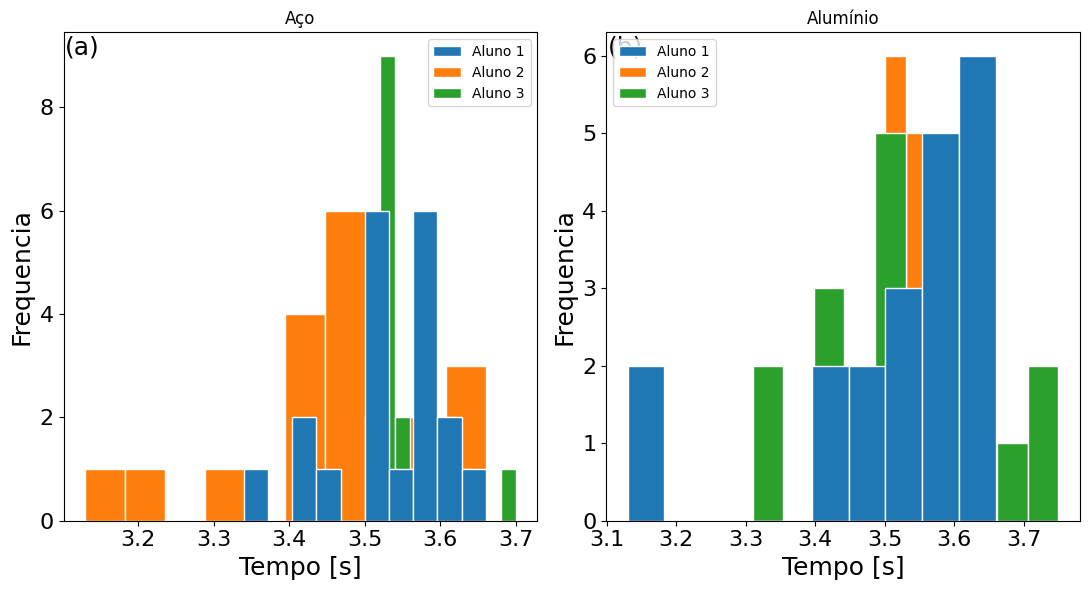

In [26]:
## Fazendo o histograma da contagem dos tempos obtidos na condição experimental 
## dados para o Grupo 4
fig, ax=plt.subplot_mosaic([['(a)', '(b)']],
                              figsize=(11, 6), constrained_layout=True)
df_g4_c2_aco['Aluno 1'].astype(float).plot(kind='hist', bins=10, ax=ax['(a)'],zorder=2, edgecolor='white', fontsize=16)
df_g4_c2_aco['Aluno 2'].astype(float).plot(kind='hist', bins=10, ax=ax['(a)'],zorder=1, edgecolor='white', fontsize=16)
df_g4_c2_aco['Aluno 3'].astype(float).plot(kind='hist', bins=10, ax=ax['(a)'],zorder=1, edgecolor='white', fontsize=16)
ax['(a)'].set_xlabel('Tempo [s]', fontsize=18)
ax['(a)'].set_ylabel('Frequencia', fontsize=18)
ax['(a)'].set_title('Aço')
ax['(a)'].legend()
df_g4_c1_aluminio['Aluno 1'].astype(float).plot(kind='hist', bins=10,ax=ax['(b)'], zorder=2, edgecolor='white' ,fontsize=16)
df_g4_c1_aluminio['Aluno 2'].astype(float).plot(kind='hist', bins=10,ax=ax['(b)'], zorder=1, edgecolor='white' ,fontsize=16)
df_g4_c1_aluminio['Aluno 3'].astype(float).plot(kind='hist', bins=10,ax=ax['(b)'], zorder=1, edgecolor='white' ,fontsize=16)
ax['(b)'].set_xlabel('Tempo [s]', fontsize=18)
ax['(b)'].set_ylabel('Frequencia', fontsize=18)
ax['(b)'].set_title('Alumínio')
ax['(b)'].legend()


# Escrevendo os itens (a), (b), ... em cada um dos gráficos da figura
for label, ax in ax.items():
    trans = mtransforms.ScaledTranslation(1.2/72, -2/72, fig.dpi_scale_trans) #-20/72, 7/72 ,, 10/72, -5/72,
    ax.text(0.0, 1.0, label, transform=ax.transAxes + trans,
            fontsize=18, verticalalignment='top')
    
fig.tight_layout()
plt.show()

## Dataset para ML

In [27]:
# df_g4_c1_aluminio
# Melt the Aluno columns
aluno_melted_g4_aluminio = pd.melt(
    df_g4_c1_aluminio,
    id_vars=[
        "Medida",
        "Grupo",
        "Material",
        "massa",
        "diametro",
        "altura",
        "comprimento",
    ],
    value_vars=["Aluno 1", "Aluno 2", "Aluno 3"],
    var_name="Aluno",
    value_name="Tempo",
)

# Melt the velocity columns
velocity_melted_g4_al = pd.melt(
    df_g4_c1_aluminio,
    id_vars=["Medida"],
    value_vars=["velocidade 1", "velocidade 2", "velocidade 3"],
    var_name="Velocidade",
    value_name="Valor_Velocidade",
)

# Map velocities to the respective Aluno
velocity_melted_g4_al["Aluno"] = velocity_melted_g4_al["Velocidade"].str.extract(r'(\d)').astype(int)
velocity_melted_g4_al["Aluno"] = "Aluno " + velocity_melted_g4_al["Aluno"].astype(str)

# Merge the two melted DataFrames
df_tidy_g4_c2 = pd.merge(aluno_melted_g4_aluminio, velocity_melted_g4_al, on=["Medida", "Aluno"], how="left")

# Drop unnecessary columns and reorder
df_tidy_g4_c2 = df_tidy_g4_c2.drop(columns=["Velocidade"]).sort_values(by=["Medida", "Aluno"])

# Display the tidy DataFrame
df_tidy_g4_c2.head()

# df_g4_c2_aco
# Melt the Aluno columns
aluno_melted_g4_aco = pd.melt(
    df_g4_c2_aco,
    id_vars=[
        "Medida",
        "Grupo",
        "Material",
        "massa",
        "diametro",
        "altura",
        "comprimento",
    ],
    value_vars=["Aluno 1", "Aluno 2", "Aluno 3"],
    var_name="Aluno",
    value_name="Tempo",
)

# Melt the velocity columns
velocity_melted_g4_aco = pd.melt(
    df_g4_c2_aco,
    id_vars=["Medida"],
    value_vars=["velocidade 1", "velocidade 2", "velocidade 3"],
    var_name="Velocidade",
    value_name="Valor_Velocidade",
)

# Map velocities to the respective Aluno
velocity_melted_g4_aco["Aluno"] = velocity_melted_g4_aco["Velocidade"].str.extract(r'(\d)').astype(int)
velocity_melted_g4_aco["Aluno"] = "Aluno " + velocity_melted_g4_aco["Aluno"].astype(str)

# Merge the two melted DataFrames
df_tidy_g4_c1 = pd.merge(aluno_melted_g4_aco, velocity_melted_g4_aco, on=["Medida", "Aluno"], how="left")

# Drop unnecessary columns and reorder
df_tidy_g4_c1 = df_tidy_g4_c1.drop(columns=["Velocidade"]).sort_values(by=["Medida", "Aluno"])

# Display the tidy DataFrame
df_tidy_g4_c1.head()



df_ml_ready_g4=pd.concat([df_tidy_g4_c1,df_tidy_g4_c2], ignore_index=True)

df_ml_ready_g4.head()

,Medida,Grupo,Material,massa,diametro,altura,comprimento,Aluno,Tempo,Valor_Velocidade
0,1,g4,aco,821.7,50.02,50.1,95.6,Aluno 1,3.59,26.629526
1,1,g4,aco,821.7,50.02,50.1,95.6,Aluno 2,3.66,26.120219
2,1,g4,aco,821.7,50.02,50.1,95.6,Aluno 3,3.50,27.314286
3,2,g4,aco,821.7,49.90,50.2,95.6,Aluno 1,3.59,26.629526
4,2,g4,aco,821.7,49.90,50.2,95.6,Aluno 2,3.21,29.781931


## Modelo de classificação para os dados coletados e organizados

In [28]:
# Preparando os dados para classificação
X = df_ml_ready_g4[['Tempo']]
y = df_ml_ready_g4['Material']

# Codificação do rótulo do material
y = y.map({'aco': 0, 'aluminio': 1})

# Dividindo os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Treinando o modelo de classificação
model = LogisticRegression()
model.fit(X_train, y_train)

# Previsões
y_pred = model.predict(X_test)

# Avaliando o modelo
accuracy = accuracy_score(y_test, y_pred)

print(f'Acurácia do modelo: {accuracy * 100:.2f}%')

Acurácia do modelo: 50.00%


## Grupo 4 colete as metricas abaixo

In [29]:
# Avaliação do modelo
accuracy = accuracy_score(y_test, y_pred)
print(f"Acurácia: {accuracy:.2f}")
print("Relatório de Classificação:")
print(classification_report(y_test, y_pred))

Acurácia: 0.50
Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.67      0.11      0.18        19
           1       0.48      0.94      0.64        17

    accuracy                           0.50        36
   macro avg       0.58      0.52      0.41        36
weighted avg       0.58      0.50      0.40        36



### Dados dos cilindros e plano inclinado grupo 5

In [30]:
## Dados cilindro de aço
delta_s = np.array([120, 120, 120])
comprimento_g5 = np.random.choice(delta_s, size=20, replace=True)
massa_medida_c1_g5 =np.array([831.9, 831.9,	831.9, 831.6, 831.8]) 
massa_c1_g5=np.random.choice(massa_medida_c1_g5, size=20, replace=True)
diametro_medido_c2=[50.10, 50.0,	50.0, 49.9, 49.9, 49.8]
diametro_c1_g5 = np.random.choice(diametro_medido_c1, size=20, replace=True)
altura_medida_c1=[49.10, 50.50,	50.20, 50.50, 50.50]
altura_c1_g5 = np.random.choice(altura_medida_c1, size=20, replace=True)

## Dados cilindro de aluminio
massa_medida_c2_g5 =np.array([264.6, 264.6,	264.6,264.5,264.7]) 
massa_c2_g5=np.random.choice(massa_medida_c2_g5, size=20, replace=True)
diametro_medido_c2=[50.00,	50.10,	50.00, 49.80, 50.00]
diametro_c2_g5 = np.random.choice(diametro_medido_c2, size=20, replace=True)
altura_medida_c2=[49.50, 49.50,	49.60, 49.70, 49.70]
altura_c2_g5 = np.random.choice(altura_medida_c2, size=20, replace=True)

In [31]:
# Dados G5
data_g5_aluminio = {
    'Medida': [i for i in range(1, 21)],
    'Aluno1':[f"{value:.2f}" for value in [4.38,	4.19,	4.63,	4.78,	4.94,	4.31,	4.19,	4.50,	4.78,	4.56,	4.53,	4.16,	4.33,	4.87,	4.97,	4.97,	4.34,	5.07,	4.19,	4.37]],
    'Aluno2':[f"{value:.2f}" for value in [3.85,	3.80,	4.13,	3.80,	3.69,	3.65,	4.15,	4.06,	4.16,	4.22,	4.22,	4.16,	4.09,	4.12,	3.33,	4.15,	4.81,	4.44,	4.16,	4.13]],
    'Aluno3':[f"{value:.2f}" for value in [4.36,	4.39,	4.38,	4.12,	3.78,	4.58,	4.50,	4.07,	4.43,	4.44,	4.43,	4.28,	4.39,	4.22,	4.72,	4.38,	4.86,	4.22,	4.03,	4.43]],
    'Grupo': np.repeat('g5',20),
    'Material': np.repeat('aluminio',20),
    'massa': massa_c2_g5,
    'diametro':diametro_c2_g5,
    'altura': altura_c2_g5,
    'comprimento': comprimento_g5, 
}

df_g5_c1_aluminio = pd.DataFrame(data_g5_aluminio)

df_g5_c1_aluminio['velocidade 1']=[c/t for c,t in zip(df_g5_c1_aluminio['comprimento'].astype(float),df_g5_c1_aluminio['Aluno1'].astype(float))]
df_g5_c1_aluminio['velocidade 2']=[c/t for c,t in zip(df_g5_c1_aluminio['comprimento'].astype(float),df_g5_c1_aluminio['Aluno2'].astype(float))]
df_g5_c1_aluminio['velocidade 3']=[c/t for c,t in zip(df_g5_c1_aluminio['comprimento'].astype(float),df_g5_c1_aluminio['Aluno3'].astype(float))]


data_g5_aco = {
    'Medida': [i for i in range(1, 21)],  # Assuming there are 60 measurements
    'Aluno1': [f"{value:.2f}" for value in [3.59,	3.59,	3.51,	3.42,	3.44,	3.43,	3.34,	3.53,	3.66,	3.60,	3.57,	3.50,	3.57,	3.59,	3.51,	3.59,	3.50,	3.53,	3.56,	3.61]],
    'Aluno2': [f"{value:.2f}" for value in [3.66,	3.21,	3.50,	3.50,	3.34,	3.53,	3.42,	3.52,	3.13,	3.44,	3.65,	3.43,	3.48,	3.40,	3.56,	3.59,	3.64,	3.50,	3.50,	3.50]],
    'Aluno3': [f"{value:.2f}" for value in [3.50,	3.59,	3.53,	3.50,	3.53,	3.53,	3.53,	3.53,	3.60,	3.53,	3.53,	3.60,	3.63,	3.56,	3.55,	3.70,	3.53,	3.53,	3.59,	3.54]],
    'Grupo': np.repeat('g5',20),
    'Material': np.repeat('aco',20),
    'massa': massa_c1_g5,
    'diametro':diametro_c1_g5,
    'altura': altura_c1_g5,
    'comprimento': comprimento_g5, 
}

df_g5_c2_aco = pd.DataFrame(data_g5_aco)

df_g5_c2_aco['velocidade 1']=[c/t for c,t in zip(df_g5_c2_aco['comprimento'].astype(float),df_g5_c2_aco['Aluno1'].astype(float))]
df_g5_c2_aco['velocidade 2']=[c/t for c,t in zip(df_g5_c2_aco['comprimento'].astype(float),df_g5_c2_aco['Aluno2'].astype(float))]
df_g5_c2_aco['velocidade 3']=[c/t for c,t in zip(df_g5_c2_aco['comprimento'].astype(float),df_g5_c2_aco['Aluno3'].astype(float))]

## Grupo 5 colete os graficos abaixo

C:\Users\user\AppData\Local\Temp\ipykernel_34324\1354333158.py:27: UserWarning: The figure layout has changed to tight
  fig.tight_layout()


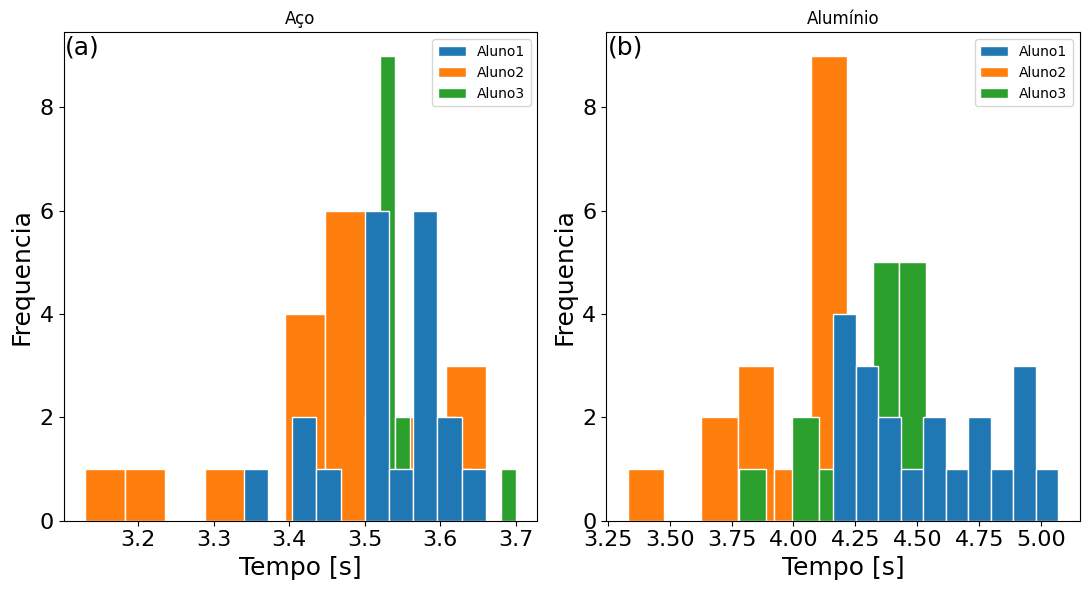

In [32]:
## Fazendo o histograma da contagem dos tempos obtidos na condição experimental 
## dados para o Grupo 5
fig, ax=plt.subplot_mosaic([['(a)', '(b)']],
                              figsize=(11, 6), constrained_layout=True)
df_g5_c2_aco['Aluno1'].astype(float).plot(kind='hist', bins=10, ax=ax['(a)'],zorder=2, edgecolor='white', fontsize=16)
df_g5_c2_aco['Aluno2'].astype(float).plot(kind='hist', bins=10, ax=ax['(a)'],zorder=1, edgecolor='white', fontsize=16)
df_g5_c2_aco['Aluno3'].astype(float).plot(kind='hist', bins=10, ax=ax['(a)'],zorder=1, edgecolor='white', fontsize=16)
ax['(a)'].set_xlabel('Tempo [s]', fontsize=18)
ax['(a)'].set_ylabel('Frequencia', fontsize=18)
ax['(a)'].set_title('Aço')
ax['(a)'].legend()
df_g5_c1_aluminio['Aluno1'].astype(float).plot(kind='hist', bins=10,ax=ax['(b)'], zorder=2, edgecolor='white' ,fontsize=16)
df_g5_c1_aluminio['Aluno2'].astype(float).plot(kind='hist', bins=10,ax=ax['(b)'], zorder=1, edgecolor='white' ,fontsize=16)
df_g5_c1_aluminio['Aluno3'].astype(float).plot(kind='hist', bins=10,ax=ax['(b)'], zorder=1, edgecolor='white' ,fontsize=16)
ax['(b)'].set_xlabel('Tempo [s]', fontsize=18)
ax['(b)'].set_ylabel('Frequencia', fontsize=18)
ax['(b)'].set_title('Alumínio')
ax['(b)'].legend()


# Escrevendo os itens (a), (b), ... em cada um dos gráficos da figura
for label, ax in ax.items():
    trans = mtransforms.ScaledTranslation(1.2/72, -2/72, fig.dpi_scale_trans) #-20/72, 7/72 ,, 10/72, -5/72,
    ax.text(0.0, 1.0, label, transform=ax.transAxes + trans,
            fontsize=18, verticalalignment='top')
    
fig.tight_layout()
plt.show()

## Dados para ML

In [34]:
# df_g5_c1_aluminio
# Melt the Aluno columns
aluno_melted_g5_aluminio = pd.melt(
    df_g5_c1_aluminio,
    id_vars=[
        "Medida",
        "Grupo",
        "Material",
        "massa",
        "diametro",
        "altura",
        "comprimento",
    ],
    value_vars=["Aluno1", "Aluno2", "Aluno3"],
    var_name="Aluno",
    value_name="Tempo",
)

# Melt the velocity columns
velocity_melted_g5_al = pd.melt(
    df_g5_c1_aluminio,
    id_vars=["Medida"],
    value_vars=["velocidade 1", "velocidade 2", "velocidade 3"],
    var_name="Velocidade",
    value_name="Valor_Velocidade",
)

# Map velocities to the respective Aluno
velocity_melted_g5_al["Aluno"] = velocity_melted_g5_al["Velocidade"].str.extract(r'(\d)').astype(int)
velocity_melted_g5_al["Aluno"] = "Aluno " + velocity_melted_g5_al["Aluno"].astype(str)

# Merge the two melted DataFrames
df_tidy_g5_c2 = pd.merge(aluno_melted_g5_aluminio, velocity_melted_g5_al, on=["Medida", "Aluno"], how="left")

# Drop unnecessary columns and reorder
df_tidy_g5_c2 = df_tidy_g5_c2.drop(columns=["Velocidade"]).sort_values(by=["Medida", "Aluno"])

# Display the tidy DataFrame
df_tidy_g5_c2.head()

# df_g5_c2_aco
# Melt the Aluno columns
aluno_melted_g5_aco = pd.melt(
    df_g5_c2_aco,
    id_vars=[
        "Medida",
        "Grupo",
        "Material",
        "massa",
        "diametro",
        "altura",
        "comprimento",
    ],
    value_vars=["Aluno1", "Aluno2", "Aluno3"],
    var_name="Aluno",
    value_name="Tempo",
)

# Melt the velocity columns
velocity_melted_g5_aco = pd.melt(
    df_g5_c2_aco,
    id_vars=["Medida"],
    value_vars=["velocidade 1", "velocidade 2", "velocidade 3"],
    var_name="Velocidade",
    value_name="Valor_Velocidade",
)

# Map velocities to the respective Aluno
velocity_melted_g5_aco["Aluno"] = velocity_melted_g5_aco["Velocidade"].str.extract(r'(\d)').astype(int)
velocity_melted_g5_aco["Aluno"] = "Aluno " + velocity_melted_g5_aco["Aluno"].astype(str)

# Merge the two melted DataFrames
df_tidy_g5_c1 = pd.merge(aluno_melted_g5_aco, velocity_melted_g5_aco, on=["Medida", "Aluno"], how="left")

# Drop unnecessary columns and reorder
df_tidy_g5_c1 = df_tidy_g5_c1.drop(columns=["Velocidade"]).sort_values(by=["Medida", "Aluno"])

# Display the tidy DataFrame
df_tidy_g5_c1.head()



df_ml_ready_g5=pd.concat([df_tidy_g5_c1,df_tidy_g5_c2], ignore_index=True)

df_ml_ready_g5.head()

,Medida,Grupo,Material,massa,diametro,altura,comprimento,Aluno,Tempo,Valor_Velocidade
0,1,g5,aco,831.9,50.02,50.2,120,Aluno1,3.59,NaN
1,1,g5,aco,831.9,50.02,50.2,120,Aluno2,3.66,NaN
2,1,g5,aco,831.9,50.02,50.2,120,Aluno3,3.50,NaN
3,2,g5,aco,831.6,49.80,50.5,120,Aluno1,3.59,NaN
4,2,g5,aco,831.6,49.80,50.5,120,Aluno2,3.21,NaN


## Modelo de classificação para os dados coletados e organizados

In [35]:
# Preparando os dados para classificação
X = df_ml_ready_g5[['Tempo']]
y = df_ml_ready_g5['Material']

# Codificação do rótulo do material
y = y.map({'aco': 0, 'aluminio': 1})

# Dividindo os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Treinando o modelo de classificação
model = LogisticRegression()
model.fit(X_train, y_train)

# Previsões
y_pred = model.predict(X_test)

# Avaliando o modelo
accuracy = accuracy_score(y_test, y_pred)

print(f'Acurácia do modelo: {accuracy * 100:.2f}%')

Acurácia do modelo: 88.89%


## Grupo 5 colete as metricas abaixo

In [36]:
# Avaliação do modelo
accuracy = accuracy_score(y_test, y_pred)
print(f"Acurácia: {accuracy:.2f}")
print("Relatório de Classificação:")
print(classification_report(y_test, y_pred))

Acurácia: 0.89
Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.83      1.00      0.90        19
           1       1.00      0.76      0.87        17

    accuracy                           0.89        36
   macro avg       0.91      0.88      0.89        36
weighted avg       0.91      0.89      0.89        36



### Dados dos cilindros e plano inclinado grupo 6

In [37]:
## Dados cilindro de aço
delta_s = np.array([79.96,	79.78,	79.82,	79.73,	79.95])
comprimento_g6 = np.random.choice(delta_s, size=20, replace=True)
massa_medida_c1_g6 =np.array([830.0,	830.0,	830.0,	830.0,	830.0]) 
massa_c1_g6=np.random.choice(massa_medida_c1_g6, size=20, replace=True)
diametro_medido_c2=[5.06,	5.02,	5]
diametro_c1_g6 = np.random.choice(diametro_medido_c1, size=20, replace=True)
altura_medida_c1=[5.01,	5.02,	5.02]
altura_c1_g6 = np.random.choice(altura_medida_c1, size=20, replace=True)

## Dados cilindro de aluminio
massa_medida_c2_g6 =np.array([265.8,	265.8,	265.8,	265.8,	265.8]) 
massa_c2_g6=np.random.choice(massa_medida_c2_g6, size=20, replace=True)
diametro_medido_c2=[50.50, 50.70, 50.30, 50.50, 50.50]
diametro_c2_g6 = np.random.choice(diametro_medido_c2, size=20, replace=True)
altura_medida_c2=[50.00, 50.50,	50.00, 50.00, 50.00]
altura_c2_g6 = np.random.choice(altura_medida_c2, size=20, replace=True)

In [38]:
# Dados G6
data_g6_aluminio = {
    'Medida': [i for i in range(1, 21)],   # Assuming there are 60 measurements
    'aluno1': [f"{value:.2f}" for value in [3.09,	3.04,	3.03,	2.97,	3.22,	3.06,	3.16,	3.09,	3.00,	3.19,	2.88,	2.87,	3.06,	3.25,	2.97,	3.09,	3.13,	3.03,	3.06,	3.00]],
    'aluno2': [f"{value:.2f}" for value in [3.12,	3.57,	3.31,	3.34,	3.12,	3.19,	3.28,	3.25,	3.25,	3.43,	3.22,	3.28,	3.18,	3.22,	3.16,	3.29,	3.13,	3.38,	3.41,	3.12]],
    'aluno3': [f"{value:.2f}" for value in [2.93,	2.72,	2.91,	3.16,	3.19,	3.22,	3.34,	3.22,	3.10,	3.19,	3.19,	3.16,	3.10,	3.19,	3.06,	3.09,	3.02,	3.06,	3.19,	3.25]],
    'aluno4': [f"{value:.2f}" for value in [3.00,	2.97,	3.18,	3.08,	3.00,	3.09,	3.07,	3.00,	3.00,	3.03,	2.97,	3.03,	3.10,	3.22,	3.10,	2.97,	3.10,	3.03,	3.19,	3.09]],
    'aluno5': [f"{value:.2f}" for value in [3.04,	3.03,	3.00,	2.97,	3.12,	2.94,	3.00,	2.91,	3.06,	3.09,	3.04,	3.13,	3.06,	2.28,	2.93,	2.91,	2.85,	2.75,	2.82,	3.00]],
    'Grupo': np.repeat('g6',20),
    'Material': np.repeat('aluminio',20),
    'massa': massa_c2_g6,
    'diametro':diametro_c2_g6,
    'altura': altura_c2_g6,
    'comprimento': comprimento_g6, 
}

df_g6_c1_aluminio = pd.DataFrame(data_g6_aluminio)

df_g6_c1_aluminio['velocidade 1']=[c/t for c,t in zip(df_g6_c1_aluminio['comprimento'].astype(float),df_g6_c1_aluminio['aluno1'].astype(float))]
df_g6_c1_aluminio['velocidade 2']=[c/t for c,t in zip(df_g6_c1_aluminio['comprimento'].astype(float),df_g6_c1_aluminio['aluno2'].astype(float))]
df_g6_c1_aluminio['velocidade 3']=[c/t for c,t in zip(df_g6_c1_aluminio['comprimento'].astype(float),df_g6_c1_aluminio['aluno3'].astype(float))]
df_g6_c1_aluminio['velocidade 4']=[c/t for c,t in zip(df_g6_c1_aluminio['comprimento'].astype(float),df_g6_c1_aluminio['aluno4'].astype(float))]
df_g6_c1_aluminio['velocidade 5']=[c/t for c,t in zip(df_g6_c1_aluminio['comprimento'].astype(float),df_g6_c1_aluminio['aluno5'].astype(float))]

data_g6_aco = {
    'Medida': [i for i in range(1, 21)],  # Assuming there are 60 measurements
    'Aluno1': [f"{value:.2f}" for value in [3.59,	3.59,	3.51,	3.42,	3.44,	3.43,	3.34,	3.53,	3.66,	3.60,	3.57,	3.50,	3.57,	3.59,	3.51,	3.59,	3.50,	3.53,	3.56,	3.61]],
    'Aluno2': [f"{value:.2f}" for value in [3.66,	3.21,	3.50,	3.50,	3.34,	3.53,	3.42,	3.52,	3.13,	3.44,	3.65,	3.43,	3.48,	3.40,	3.56,	3.59,	3.64,	3.50,	3.50,	3.50]],
    'Aluno3': [f"{value:.2f}" for value in [3.50,	3.59,	3.53,	3.50,	3.53,	3.53,	3.53,	3.53,	3.60,	3.53,	3.53,	3.60,	3.63,	3.56,	3.55,	3.70,	3.53,	3.53,	3.59,	3.54]],
    'Grupo': np.repeat('g6',20),
    'Material': np.repeat('aco',20),
    'massa': massa_c1_g6,
    'diametro':diametro_c1_g6,
    'altura': altura_c1_g6,
    'comprimento': comprimento_g6,
}

df_g6_c2_aco = pd.DataFrame(data_g6_aco)

df_g6_c2_aco['velocidade 1']=[c/t for c,t in zip(df_g6_c2_aco['comprimento'].astype(float),df_g6_c2_aco['Aluno1'].astype(float))]
df_g6_c2_aco['velocidade 2']=[c/t for c,t in zip(df_g6_c2_aco['comprimento'].astype(float),df_g6_c2_aco['Aluno2'].astype(float))]
df_g6_c2_aco['velocidade 3']=[c/t for c,t in zip(df_g6_c2_aco['comprimento'].astype(float),df_g6_c2_aco['Aluno3'].astype(float))]

## Grupo 6 colete os graficos abaixo

C:\Users\user\AppData\Local\Temp\ipykernel_34324\1123275022.py:29: UserWarning: The figure layout has changed to tight
  fig.tight_layout()


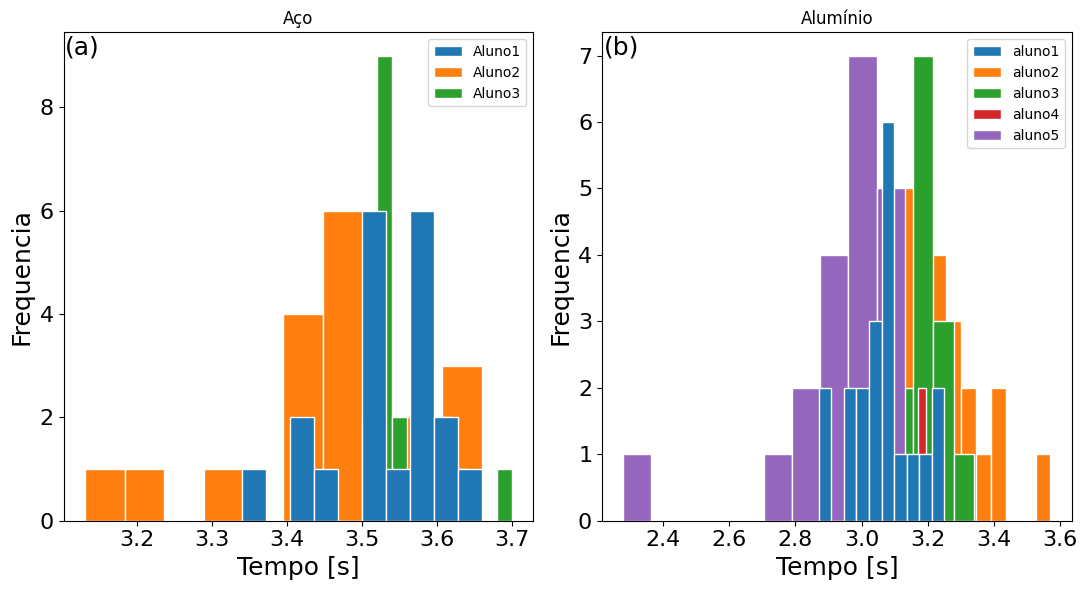

In [39]:
## Fazendo o histograma da contagem dos tempos obtidos na condição experimental 
## dados para o Grupo 6
fig, ax=plt.subplot_mosaic([['(a)', '(b)']],
                              figsize=(11, 6), constrained_layout=True)
df_g6_c2_aco['Aluno1'].astype(float).plot(kind='hist', bins=10, ax=ax['(a)'],zorder=2, edgecolor='white', fontsize=16)
df_g6_c2_aco['Aluno2'].astype(float).plot(kind='hist', bins=10, ax=ax['(a)'],zorder=1, edgecolor='white', fontsize=16)
df_g6_c2_aco['Aluno3'].astype(float).plot(kind='hist', bins=10, ax=ax['(a)'],zorder=1, edgecolor='white', fontsize=16)
ax['(a)'].set_xlabel('Tempo [s]', fontsize=18)
ax['(a)'].set_ylabel('Frequencia', fontsize=18)
ax['(a)'].set_title('Aço')
ax['(a)'].legend()
df_g6_c1_aluminio['aluno1'].astype(float).plot(kind='hist', bins=10,ax=ax['(b)'], zorder=2, edgecolor='white' ,fontsize=16)
df_g6_c1_aluminio['aluno2'].astype(float).plot(kind='hist', bins=10,ax=ax['(b)'], zorder=1, edgecolor='white' ,fontsize=16)
df_g6_c1_aluminio['aluno3'].astype(float).plot(kind='hist', bins=10,ax=ax['(b)'], zorder=1, edgecolor='white' ,fontsize=16)
df_g6_c1_aluminio['aluno4'].astype(float).plot(kind='hist', bins=10,ax=ax['(b)'], zorder=1, edgecolor='white' ,fontsize=16)
df_g6_c1_aluminio['aluno5'].astype(float).plot(kind='hist', bins=10,ax=ax['(b)'], zorder=1, edgecolor='white' ,fontsize=16)
ax['(b)'].set_xlabel('Tempo [s]', fontsize=18)
ax['(b)'].set_ylabel('Frequencia', fontsize=18)
ax['(b)'].set_title('Alumínio')
ax['(b)'].legend()


# Escrevendo os itens (a), (b), ... em cada um dos gráficos da figura
for label, ax in ax.items():
    trans = mtransforms.ScaledTranslation(1.2/72, -2/72, fig.dpi_scale_trans) #-20/72, 7/72 ,, 10/72, -5/72,
    ax.text(0.0, 1.0, label, transform=ax.transAxes + trans,
            fontsize=18, verticalalignment='top')
    
fig.tight_layout()
plt.show()

## Dados para ML

In [43]:
# df_g6_c1_aluminio
# Melt the Aluno columns
aluno_melted_g6_aluminio = pd.melt(
    df_g6_c1_aluminio,
    id_vars=[
        "Medida",
        "Grupo",
        "Material",
        "massa",
        "diametro",
        "altura",
        "comprimento",
    ],
    value_vars=['aluno1', 'aluno2', 'aluno3', 'aluno4','aluno5'],
    var_name="Aluno",
    value_name="Tempo",
)

# Melt the velocity columns
velocity_melted_g6_al = pd.melt(
    df_g6_c1_aluminio,
    id_vars=["Medida"],
    value_vars=["velocidade 1", "velocidade 2", "velocidade 3", "velocidade 4", "velocidade 5"],
    var_name="Velocidade",
    value_name="Valor_Velocidade",
)

# Map velocities to the respective Aluno
velocity_melted_g6_al["Aluno"] = velocity_melted_g6_al["Velocidade"].str.extract(r'(\d)').astype(int)
velocity_melted_g6_al["Aluno"] = "Aluno " + velocity_melted_g6_al["Aluno"].astype(str)

# Merge the two melted DataFrames
df_tidy_g6_c2 = pd.merge(aluno_melted_g6_aluminio, velocity_melted_g6_al, on=["Medida", "Aluno"], how="left")

# Drop unnecessary columns and reorder
df_tidy_g6_c2 = df_tidy_g6_c2.drop(columns=["Velocidade"]).sort_values(by=["Medida", "Aluno"])

# Display the tidy DataFrame
df_tidy_g6_c2.head()

# df_g6_c2_aco
# Melt the Aluno columns
aluno_melted_g6_aco = pd.melt(
    df_g6_c2_aco,
    id_vars=[
        "Medida",
        "Grupo",
        "Material",
        "massa",
        "diametro",
        "altura",
        "comprimento",
    ],
    value_vars=["Aluno1", "Aluno2", "Aluno3"],
    var_name="Aluno",
    value_name="Tempo",
)

# Melt the velocity columns
velocity_melted_g6_aco = pd.melt(
    df_g6_c2_aco,
    id_vars=["Medida"],
    value_vars=["velocidade 1", "velocidade 2", "velocidade 3"],
    var_name="Velocidade",
    value_name="Valor_Velocidade",
)

# Map velocities to the respective Aluno
velocity_melted_g6_aco["Aluno"] = velocity_melted_g6_aco["Velocidade"].str.extract(r'(\d)').astype(int)
velocity_melted_g6_aco["Aluno"] = "Aluno " + velocity_melted_g6_aco["Aluno"].astype(str)

# Merge the two melted DataFrames
df_tidy_g6_c1 = pd.merge(aluno_melted_g6_aco, velocity_melted_g6_aco, on=["Medida", "Aluno"], how="left")

# Drop unnecessary columns and reorder
df_tidy_g6_c1 = df_tidy_g6_c1.drop(columns=["Velocidade"]).sort_values(by=["Medida", "Aluno"])

# Display the tidy DataFrame
df_tidy_g6_c1.head()



df_ml_ready_g6=pd.concat([df_tidy_g6_c1,df_tidy_g6_c2], ignore_index=True)

df_ml_ready_g6.head()

,Medida,Grupo,Material,massa,diametro,altura,comprimento,Aluno,Tempo,Valor_Velocidade
0,1,g6,aco,830.0,49.8,5.02,79.96,Aluno1,3.59,NaN
1,1,g6,aco,830.0,49.8,5.02,79.96,Aluno2,3.66,NaN
2,1,g6,aco,830.0,49.8,5.02,79.96,Aluno3,3.50,NaN
3,2,g6,aco,830.0,50.0,5.02,79.95,Aluno1,3.59,NaN
4,2,g6,aco,830.0,50.0,5.02,79.95,Aluno2,3.21,NaN


## Modelo de classificação para os dados coletados e organizados

In [44]:
# Preparando os dados para classificação
X = df_ml_ready_g6[['Tempo']]
y = df_ml_ready_g6['Material']

# Codificação do rótulo do material
y = y.map({'aco': 0, 'aluminio': 1})

# Dividindo os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Treinando o modelo de classificação
model = LogisticRegression()
model.fit(X_train, y_train)

# Previsões
y_pred = model.predict(X_test)

# Avaliando o modelo
accuracy = accuracy_score(y_test, y_pred)

print(f'Acurácia do modelo: {accuracy * 100:.2f}%')

Acurácia do modelo: 93.75%


## Grupo 6 colete as metricas abaixo

In [45]:
# Avaliação do modelo
accuracy = accuracy_score(y_test, y_pred)
print(f"Acurácia: {accuracy:.2f}")
print("Relatório de Classificação:")
print(classification_report(y_test, y_pred))

Acurácia: 0.94
Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.90      0.95      0.92        19
           1       0.96      0.93      0.95        29

    accuracy                           0.94        48
   macro avg       0.93      0.94      0.94        48
weighted avg       0.94      0.94      0.94        48

